**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing Data**

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1-QwWigkene6K-EXRQTXEEEghq9SMiirb')

**EDA and Data Cleaning**

In [3]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'],dayfirst=True)

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(['company','agent'],axis=1, inplace=True)

In [ ]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
df.duplicated().sum()

32020

In [ ]:
df.drop_duplicates(keep='first')

In [10]:
df.shape

(119390, 31)

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Res_month
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104,6.334123
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00,3.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00,6.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,9.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,12.000000
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN,3.346352


<Axes: title={'center': 'Check anomalies in adr'}>

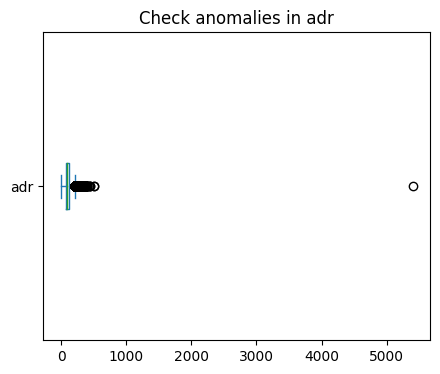

In [12]:
df['adr'].plot(kind='box', title='Check anomalies in adr',figsize=(5,4),vert=False)

In [13]:
df = df[(df['adr']>0 ) & (df['adr']<5000)]

In [14]:
df['adr'].agg(['mean','median'])

mean      103.485715
median     95.000000
Name: adr, dtype: float64

In [ ]:
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Res_month
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,9
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,9


**Data Analysis and Visualization**

In [15]:
canceled_per = df['is_canceled'].value_counts(normalize=True)
canceled_per

is_canceled
0    0.62522
1    0.37478
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

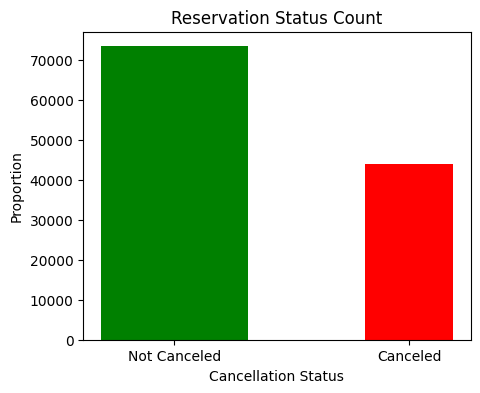

In [16]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')

plt.bar(['Not Canceled', 'Canceled'], df['is_canceled'].value_counts(0),df['is_canceled'].value_counts(1),color=['green','red'])
plt.xlabel('Cancellation Status')
plt.ylabel('Proportion')
plt.show

In [17]:
print(df['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Groups' 'Complementary'
 'Undefined' 'Aviation']


In [ ]:
#df['market_segment']=df['market_segment'].astype('category')

<function matplotlib.pyplot.show(close=None, block=None)>

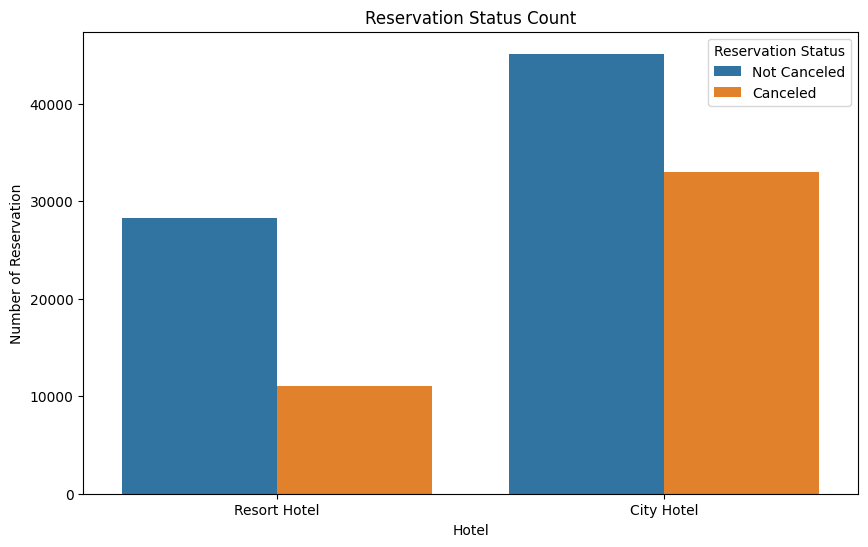

In [18]:
plt.figure(figsize=(10,6))
plt.title('Reservation Status Count')

hcr = sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservation')

handles, labels = hcr.get_legend_handles_labels()

plt.legend(handles, ['Not Canceled', 'Canceled'], title='Reservation Status')

plt.show

In [ ]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [ ]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()


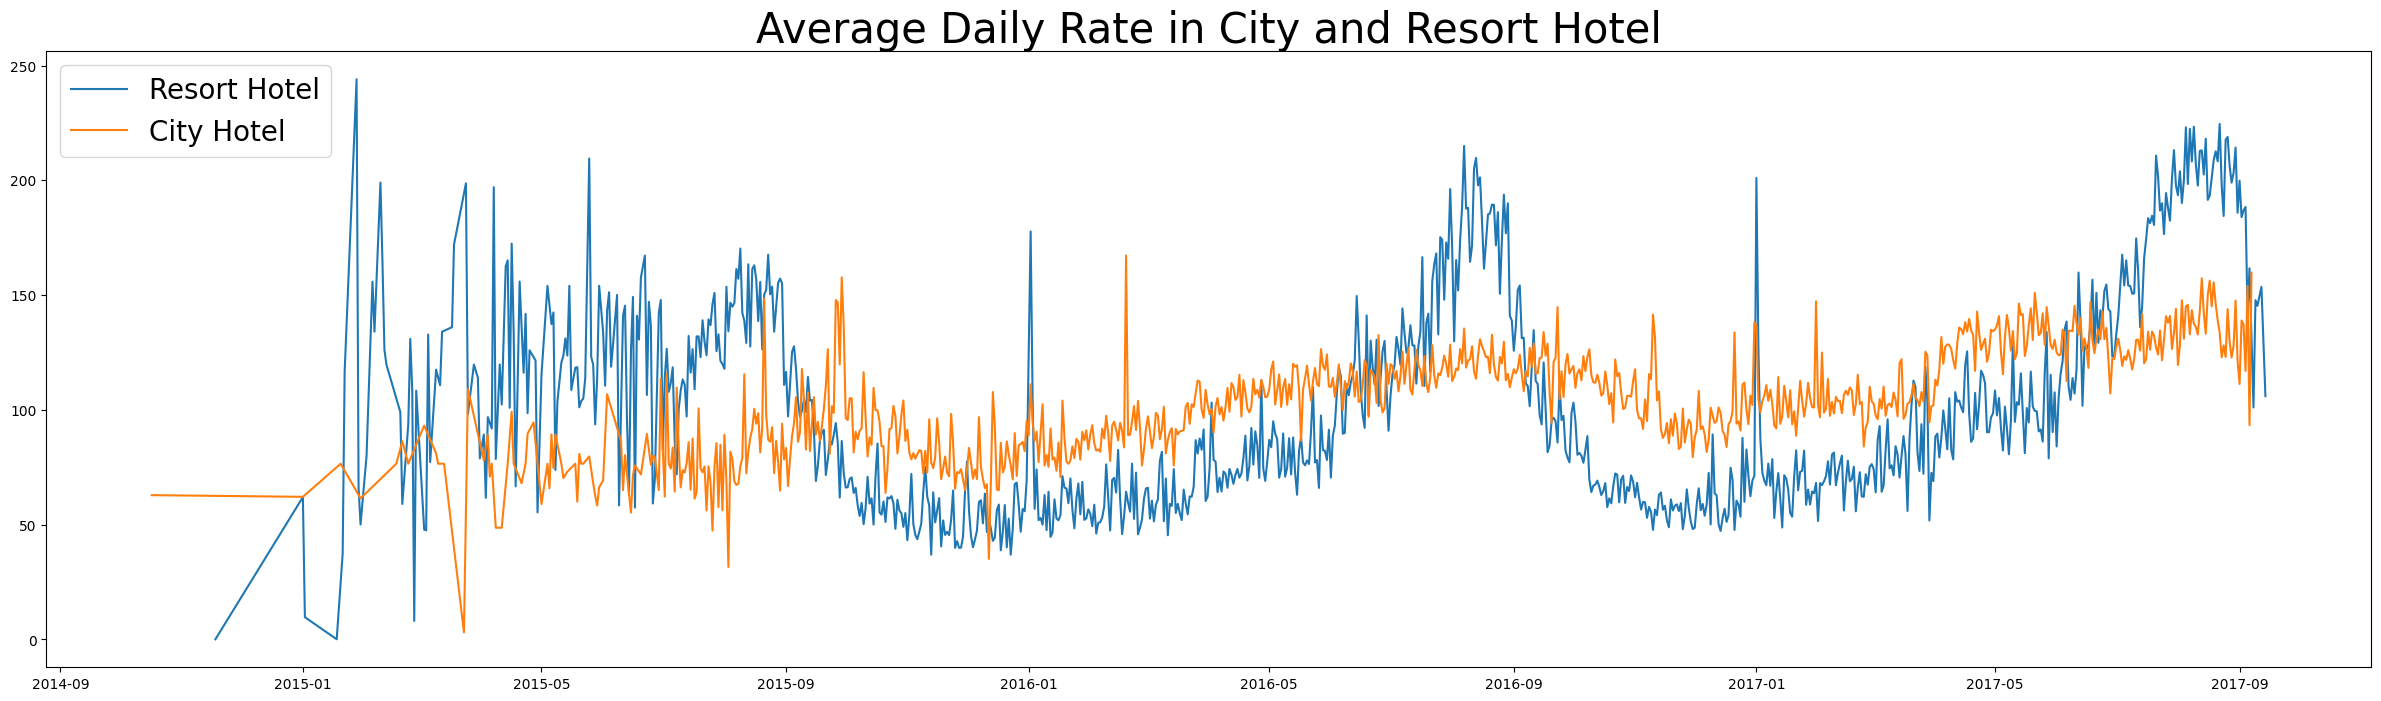

In [ ]:
plt.figure(figsize=(30,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 30)

plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')

plt.legend(fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

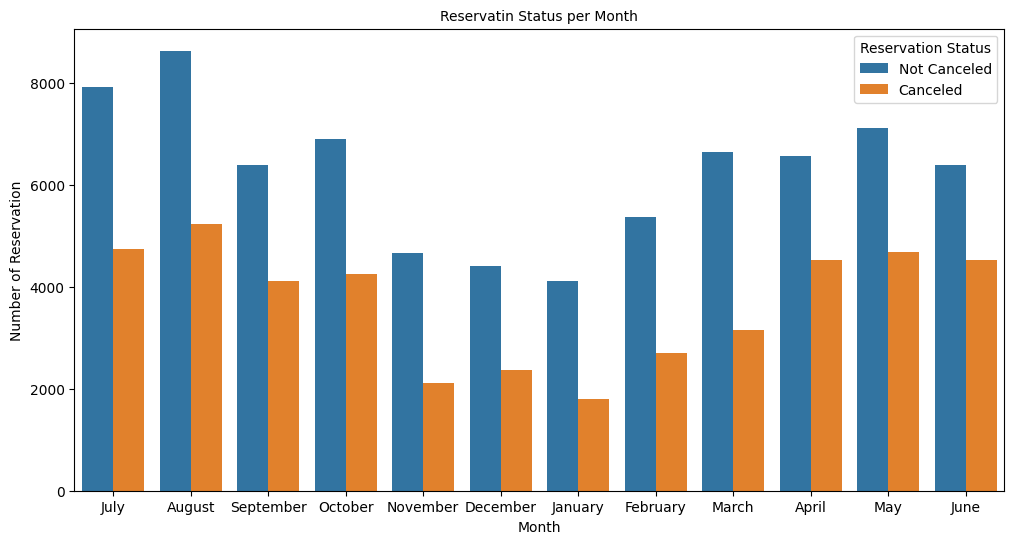

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Reservatin Status per Month',fontsize = 10)

mcr = sns.countplot(x='arrival_date_month', hue='is_canceled', data=df)
plt.xlabel('Month')
plt.ylabel('Number of Reservation')

handles, labels = mcr.get_legend_handles_labels()
plt.legend(handles, ['Not Canceled', 'Canceled'], title='Reservation Status')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

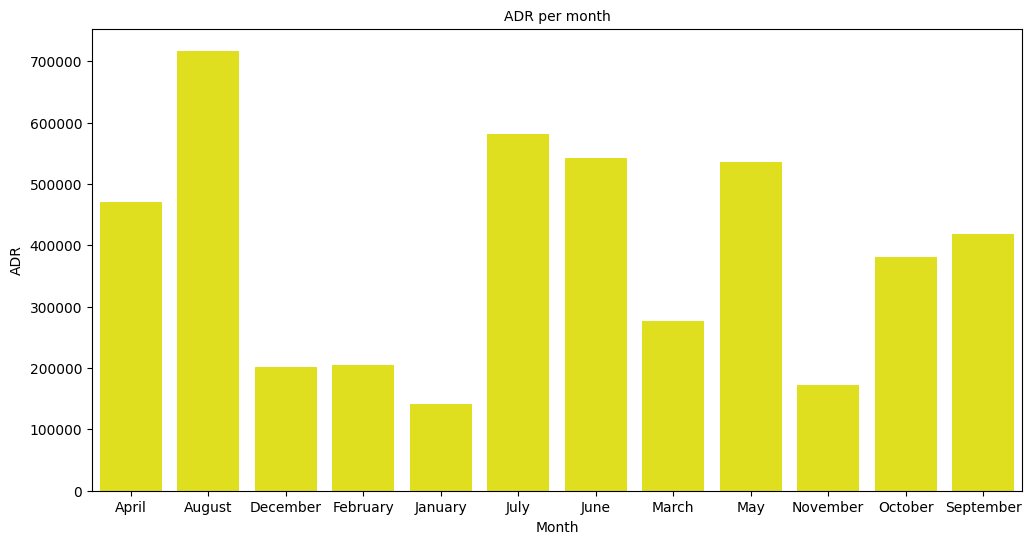

In [ ]:
plt.figure(figsize=(12,6))
plt.title('ADR per month',fontsize = 10)

sns.barplot(x='arrival_date_month', y='adr', data=df[df['is_canceled'] == 1].groupby('arrival_date_month')['adr'].sum().reset_index(), color='Yellow')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show



In [36]:

cancelled_data = df[df['is_canceled'] == 1]
TOP_10_COUNTRY = canceled_data['country'].value_counts().head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

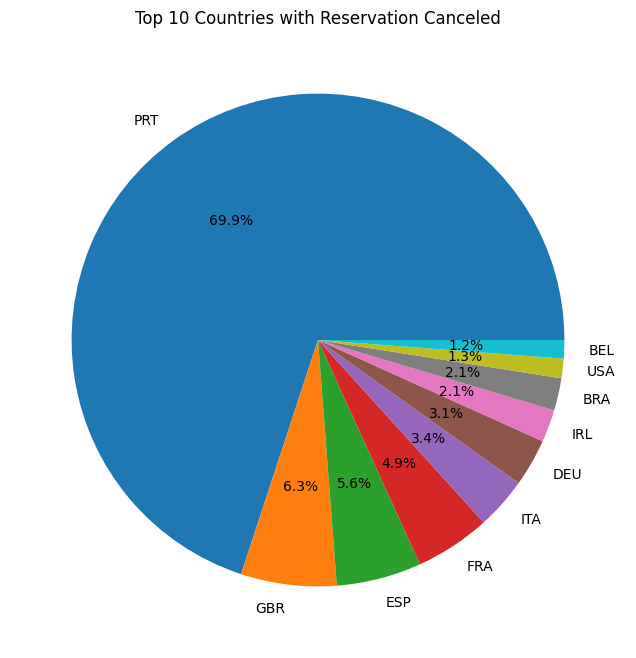

In [24]:
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries with Reservation Canceled')

plt.pie(TOP_10_COUNTRY, labels=TOP_10_COUNTRY.index, autopct='%1.1f%%')
plt.show

In [25]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.477821
Offline TA/TO    0.203408
Groups           0.166552
Direct           0.105306
Corporate        0.044393
Aviation         0.001967
Complementary    0.000536
Undefined        0.000017
Name: proportion, dtype: float64

In [37]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.470779
Groups           0.274324
Offline TA/TO    0.187912
Direct           0.043240
Corporate        0.022427
Aviation         0.001159
Complementary    0.000114
Undefined        0.000045
Name: proportion, dtype: float64

In [39]:
not_cancelled_data = df[df['is_canceled'] == 0]

In [43]:
# cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr = cancelled_data_filtered.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
cancelled_df_adr.reset_index(inplace=True)

# not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr = not_cancelled_data_filtered.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
not_cancelled_df_adr.reset_index(inplace=True)

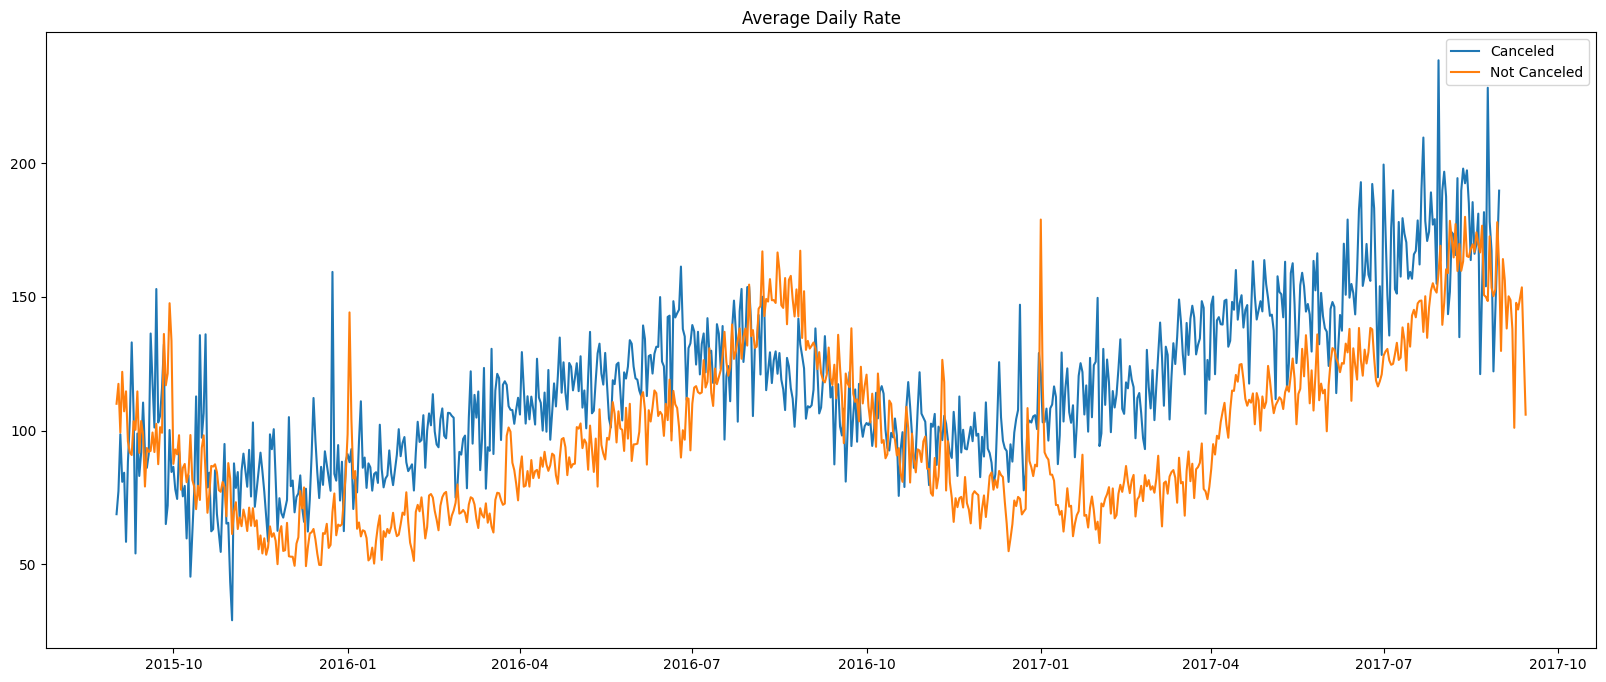

In [44]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate')

plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label='Canceled')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='Not Canceled')

plt.legend()
plt.show()

In [42]:
cancelled_data_filtered = cancelled_data[(cancelled_data['reservation_status_date'] >= '2015-09-01') & (cancelled_data['reservation_status_date'] <= '2017-09-30')]
not_cancelled_data_filtered = not_cancelled_data[(not_cancelled_data['reservation_status_date'] >= '2015-09-01') & (not_cancelled_data['reservation_status_date'] <= '2017-09-30')]
